# Output files will be here

In [4]:
import os
output_path = "/Users/Jayee/Library/CloudStorage/OneDrive-UW-Madison/PhD(my_PC)/PhD(output_files)/Engineering_projects/Indentation_tests/240616_preliminary_analysis"

## Loading and saving the required data
We have data from the onedrive folder. So we first make a replica of the required data and save it in the folder where our code is.

In [26]:
import numpy as np
import pandas as pd

path = "/Users/Jayee/Library/CloudStorage/OneDrive-UW-Madison/PhD(Data)/Nanoindentation data-selected/Spherical Indentation data/Sph Indentation properties vs block parameters.xlsx"
required_columns = [0,1,2,3,4]
required_rows = [i for i in np.arange(18)]
df = pd.read_excel(path,sheet_name = 0, usecols=required_columns, nrows=19)
df.to_excel("sp_indentation_data.xlsx",index=False)

## Loading the saved data 
We have made an outputfile containing the data and saved it in the current folder. Now we want to load this data into an array called data_with_testnames.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_name = "sp_indentation_data.xlsx"
new_path = !pwd 
new_path= new_path[0]
new_path = os.path.join(new_path,file_name)

df = pd.read_excel(file_name)
data_with_testnames = df[1:].values

There are 3 ategories. red, green, blue.
The first 7 data are in category red.
The next 4 are in category green.
The last 6 are in category blue. Lets seggregate them right away from here.

In [2]:
data_with_testnames_r = data_with_testnames[0:7,:] # from first to 7th data point.
data_with_testnames_g = data_with_testnames[7:11,:]
data_with_testnamesb = data_with_testnames[11:,:]

The above data_with_testnames is a 2d array. The columns represent the following.
- cloumn 0 : test name
- column 1 : Linear strain hardening co-efficient (K)
- column 2 : indentation yield strength, (Y,GPa)
- column 3 : shortest distance from the grain boundary (x,micro meters)
- column 4 : Misorientation angle (o,degrees)

So, lets create another variable called "data" with no test names in it.

In [3]:
# All data combined
data = data_with_testnames[:,1:]
K = data[:,0]
Y = data[:,1]
x = data[:,2]
o = data[:,3]

# Only the red data
datar = data_with_testnames_r[:,1:]
Kr = datar[:,0]
Yr = datar[:,1]
xr = datar[:,2]
or_ = datar[:,3]

# Only the green data
datag = data_with_testnames_g[:,1:]
Kg = datag[:,0]
Yg = datag[:,1]
xg = datag[:,2]
og = datag[:,3]

# Only the blue data
datab = data_with_testnamesb[:,1:]
Kb = datab[:,0]
Yb = datab[:,1]
xb = datab[:,2]
ob = datab[:,3]

The above "data" variable is a 2d array. The columns represent the following.
- column 0 : Linear strain hardening co-efficient(Y)
- column 1 : indentation yield strength, (Y,GPa)
- column 2 : shortest distance from the grain boundary (x,micro meters)
- column 3 : Misorientation angle (o,degrees)

# Visaulizing the data


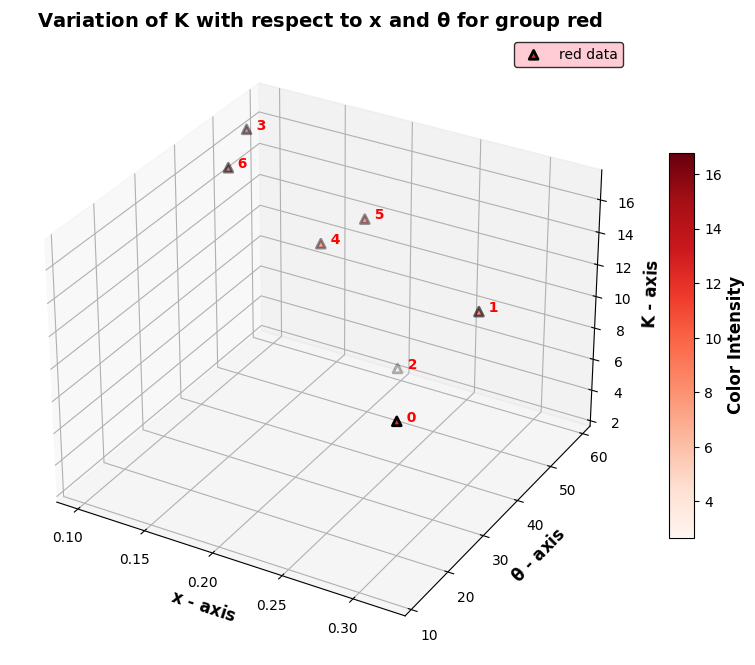

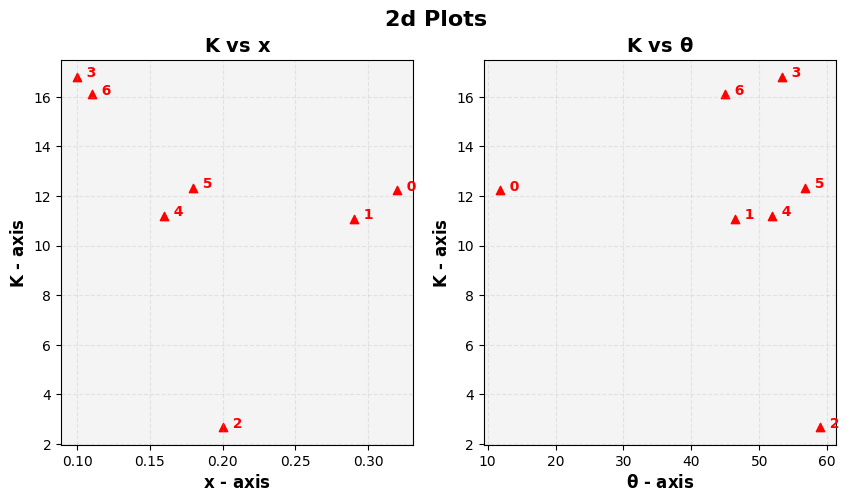

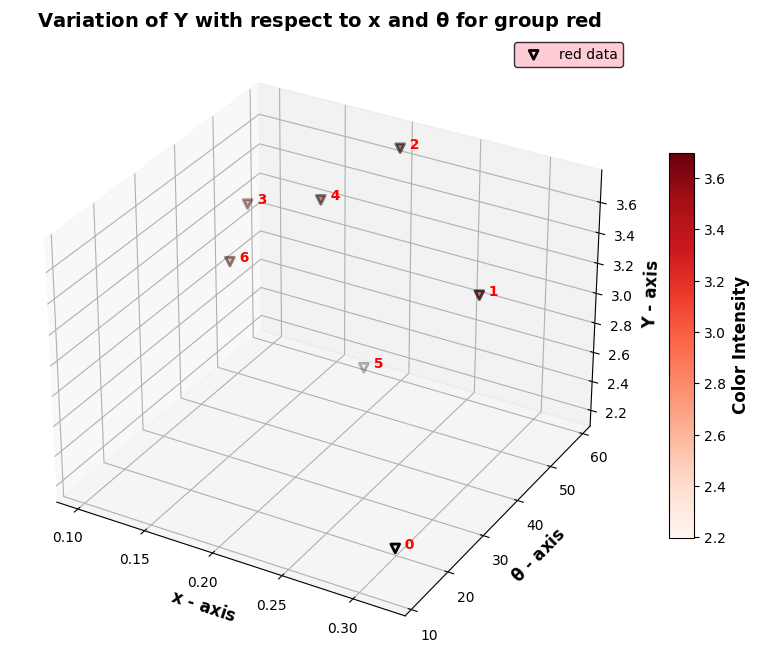

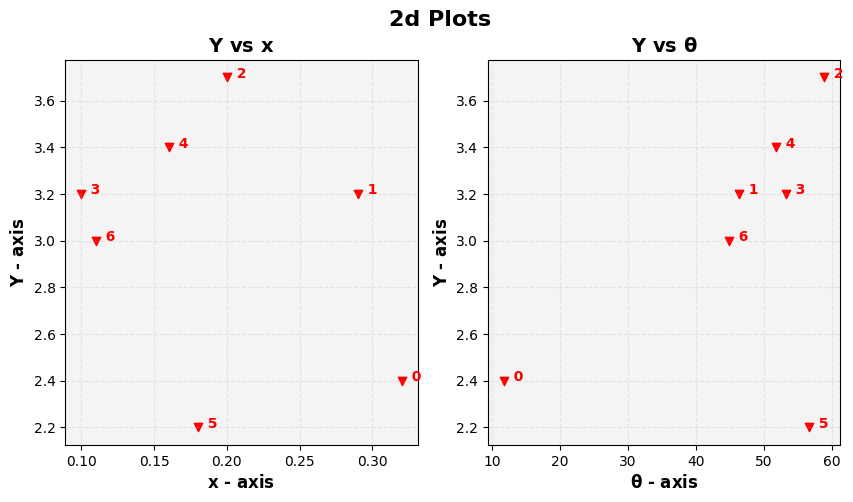

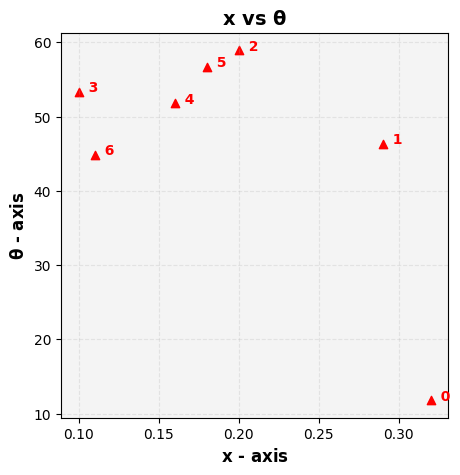

In [11]:
import matplotlib.pyplot as plt

# K vs x and o for red
## 3d plot
fig = plt.figure(figsize=[10,10])
axs = fig.add_subplot(111,projection="3d")
axs.set_xlabel("$\mathbf{x}$ - axis", fontweight="bold",fontsize=12)
axs.set_ylabel("$\mathbf{\\theta}$ - axis", fontweight = "bold", fontsize=12)
axs.set_zlabel("$\mathbf{K}$ - axis", fontweight="bold", fontsize=12)
axs.set_title("Variation of $\mathbf{K}$ with respect to $\mathbf{x}$ and $\mathbf{\\theta}$ for group red",
              fontweight="bold",
              fontsize=14)

scatter = axs.scatter(xr,or_,Kr,c=Kr,  marker = "^", edgecolor="k",linewidth=2,s=40, cmap= "Reds",label= "red data" )
for i, (x, o, K) in enumerate(zip(xr,or_, Kr)):
    axs.text(x, o, K, f'  {i}', color='red', fontsize=10, fontweight='bold')
legend = axs.legend(loc="best",facecolor="pink", edgecolor="black")
cbar = fig.colorbar(scatter, ax=axs, shrink=0.5, aspect=15)
cbar.set_label('Color Intensity', fontsize=12, fontweight='bold')

## K vs x and K vs o for red
fig,axs = plt.subplots(1,2,figsize=[10,5])
fig.suptitle("2d Plots", fontweight="bold",fontsize=16)
axs[0].set_title("$\mathbf{K}$ vs $\mathbf{x}$", fontweight="bold", fontsize=14)
axs[1].set_title("$\mathbf{K}$ vs $\mathbf{\\theta}$", fontweight="bold", fontsize=14)
axs[0].set_xlabel("$\mathbf{x}$ - axis", fontweight="bold", fontsize=12)
axs[1].set_xlabel("$\mathbf{\\theta}$ - axis", fontweight="bold", fontsize=12)
axs[0].scatter(xr,Kr,c="red",marker="^")
for i, (x, K) in enumerate(zip(xr, Kr)):
    axs[0].text(x, K, f'  {i}', color='red', fontsize=10, fontweight='bold')
axs[1].scatter(or_,Kr,c="red",marker ="^" )
for i, ( o, K) in enumerate(zip(or_, Kr)):
    axs[1].text(o, K, f'  {i}', color='red', fontsize=10, fontweight='bold')

for i in [0,1]:
    axs[i].set_ylabel("$\mathbf{K}$ - axis", fontweight="bold", fontsize=12)
    axs[i].set_facecolor("#f4f4f4")
    axs[i].grid(True, linestyle="--", alpha = 0.25)
    #axs[i].legend(loc="best",facecolor="pink", edgecolor = "black")

# Y vs x and o for red
## 3d plot
fig = plt.figure(figsize=[10,10])
axs = fig.add_subplot(111,projection="3d")
axs.set_xlabel("$\mathbf{x}$ - axis", fontweight="bold",fontsize=12)
axs.set_ylabel("$\mathbf{\\theta}$ - axis", fontweight = "bold", fontsize=12)
axs.set_zlabel("$\mathbf{Y}$ - axis", fontweight="bold", fontsize=12)
axs.set_title("Variation of $\mathbf{Y}$ with respect to $\mathbf{x}$ and $\mathbf{\\theta}$ for group red",
              fontweight="bold",
              fontsize=14)

scatter = axs.scatter(xr,or_,Yr,c=Yr,  marker = "v", edgecolor="k",linewidth=2,s=40, cmap= "Reds",label= "red data" )
for i, (x, o, Y) in enumerate(zip(xr, or_, Yr)):
    axs.text(x, o, Y, f'  {i}', color='red', fontsize=10, fontweight='bold')
legend = axs.legend(loc="best",facecolor="pink", edgecolor="black")
cbar = fig.colorbar(scatter, ax=axs, shrink=0.5, aspect=15)
cbar.set_label('Color Intensity', fontsize=12, fontweight='bold')

# Y vs x and Y vs o for red
fig,axs = plt.subplots(1,2,figsize=[10,5])
fig.suptitle("2d Plots", fontweight="bold",fontsize=16)
axs[0].set_title("$\mathbf{Y}$ vs $\mathbf{x}$", fontweight="bold", fontsize=14)
axs[1].set_title("$\mathbf{Y}$ vs $\mathbf{\\theta}$", fontweight="bold", fontsize=14)
axs[0].set_xlabel("$\mathbf{x}$ - axis", fontweight="bold", fontsize=12)
axs[1].set_xlabel("$\mathbf{\\theta}$ - axis", fontweight="bold", fontsize=12)
axs[0].scatter(xr,Yr,c="red",marker="v")
for i, (x, Y) in enumerate(zip(xr, Yr)):
    axs[0].text(x, Y, f'  {i}', color='red', fontsize=10, fontweight='bold')
axs[1].scatter(or_,Yr,c="red",marker ="v" )
for i, ( o, Y) in enumerate(zip( or_, Yr)):
    axs[1].text(o, Y, f'  {i}', color='red', fontsize=10, fontweight='bold')

for i in [0,1]:
    axs[i].set_ylabel("$\mathbf{Y}$ - axis", fontweight="bold", fontsize=12)
    axs[i].set_facecolor("#f4f4f4")
    axs[i].grid(True, linestyle="--", alpha = 0.25)
    #axs[i].legend(loc="best",facecolor="pink", edgecolor = "black")
    
# Y vs x and Y vs o for red
fig,axs = plt.subplots(1,1,figsize=[5,5])
axs.set_title("$\mathbf{x}$ vs $\mathbf{\\theta}$", fontweight="bold", fontsize=14)
axs.set_xlabel("$\mathbf{x}$ - axis", fontweight="bold", fontsize=12)
axs.set_ylabel("$\mathbf{\\theta}$ - axis", fontweight="bold", fontsize=12)
axs.scatter(xr,or_,c="red",marker="^")
for i, (x, o) in enumerate(zip(xr, or_)):
    axs.text(x, o, f'  {i}', color='red', fontsize=10, fontweight='bold')
axs.set_facecolor("#f4f4f4")
axs.grid(True, linestyle="--", alpha = 0.25)


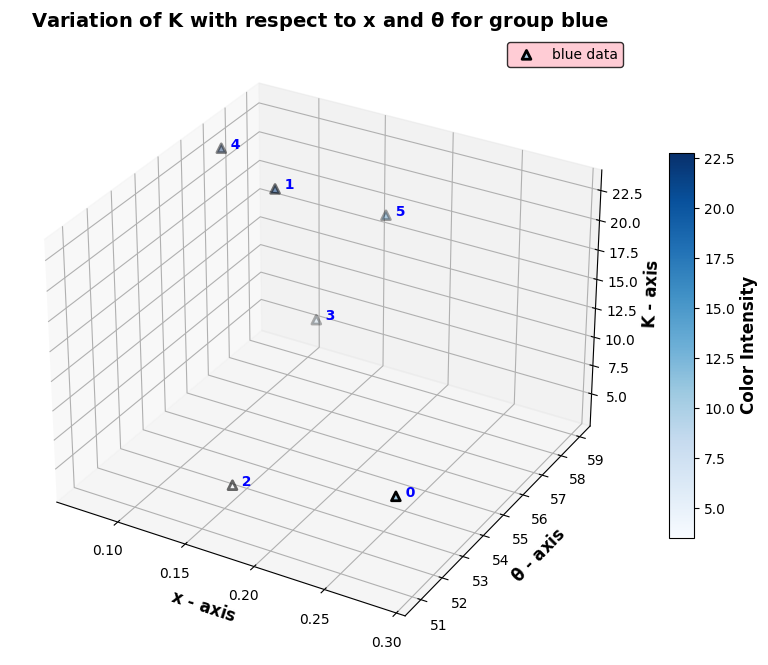

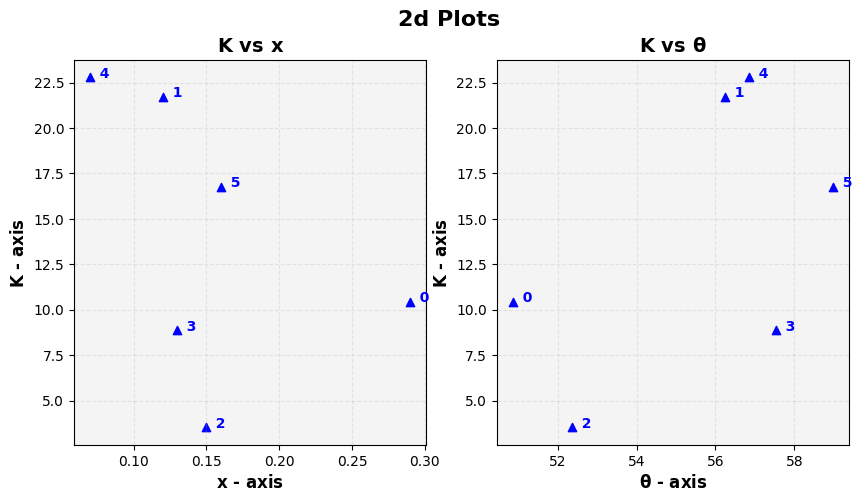

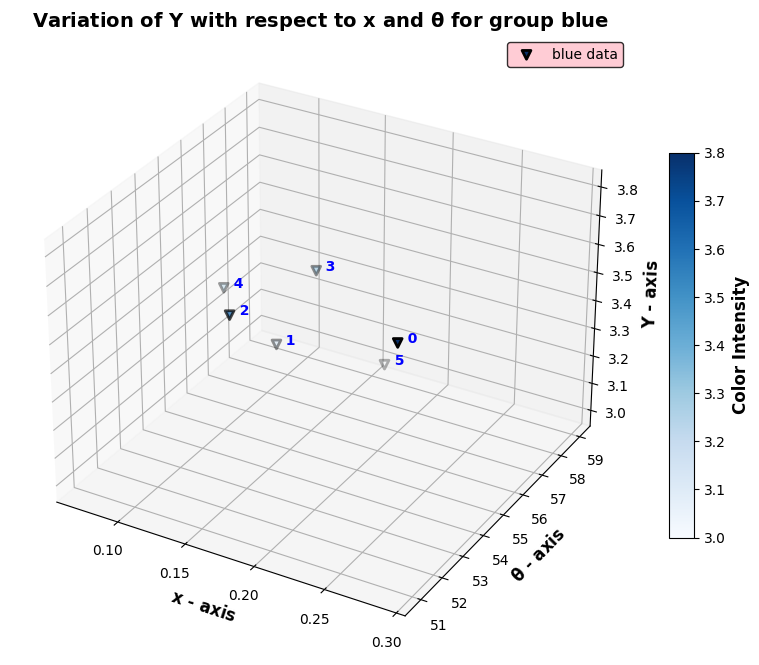

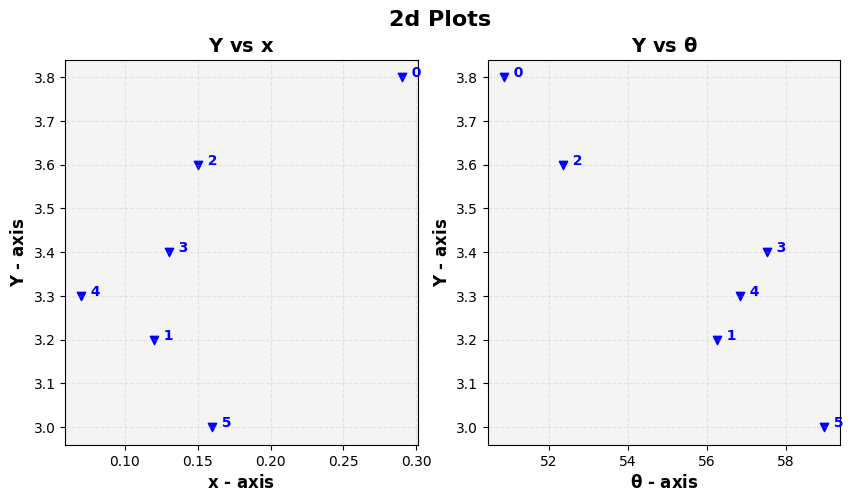

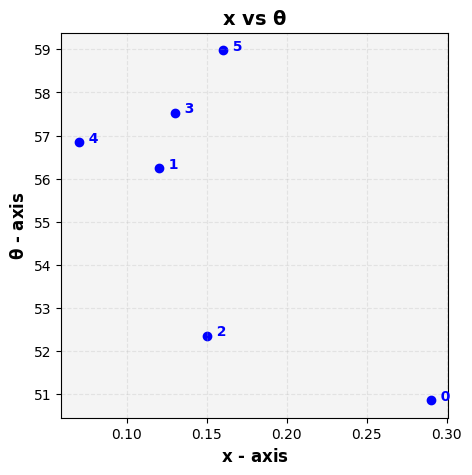

In [12]:
# K vs x and o for blue
## 3d plot
fig = plt.figure(figsize=[10,10])
axs = fig.add_subplot(111,projection="3d")
axs.set_xlabel("$\mathbf{x}$ - axis", fontweight="bold",fontsize=12)
axs.set_ylabel("$\mathbf{\\theta}$ - axis", fontweight = "bold", fontsize=12)
axs.set_zlabel("$\mathbf{K}$ - axis", fontweight="bold", fontsize=12)
axs.set_title("Variation of $\mathbf{K}$ with respect to $\mathbf{x}$ and $\mathbf{\\theta}$ for group blue",
              fontweight="bold",
              fontsize=14)

scatter = axs.scatter(xb,ob,Kb,c=Kb,  marker = "^", edgecolor="k",linewidth=2,s=40, cmap= "Blues",label= "blue data" )
for i, (x, o, K) in enumerate(zip(xb, ob, Kb)):
    axs.text(x, o, K, f'  {i}', color='blue', fontsize=10, fontweight='bold')
legend = axs.legend(loc="best",facecolor="pink", edgecolor="black")
cbar = fig.colorbar(scatter, ax=axs, shrink=0.5, aspect=15)
cbar.set_label('Color Intensity', fontsize=12, fontweight='bold')
## K vs x and K vs o for blue
fig,axs = plt.subplots(1,2,figsize=[10,5])
fig.suptitle("2d Plots", fontweight="bold",fontsize=16)
axs[0].set_title("$\mathbf{K}$ vs $\mathbf{x}$", fontweight="bold", fontsize=14)
axs[1].set_title("$\mathbf{K}$ vs $\mathbf{\\theta}$", fontweight="bold", fontsize=14)
axs[0].set_xlabel("$\mathbf{x}$ - axis", fontweight="bold", fontsize=12)
axs[1].set_xlabel("$\mathbf{\\theta}$ - axis", fontweight="bold", fontsize=12)
axs[0].scatter(xb,Kb,c="blue",marker="^")
for i, (x, K) in enumerate(zip(xb, Kb)):
    axs[0].text(x, K, f'  {i}', color='blue', fontsize=10, fontweight='bold')
axs[1].scatter(ob,Kb,c="blue",marker ="^" )
for i, ( o, K) in enumerate(zip( ob, Kb)):
    axs[1].text(o, K, f'  {i}', color='blue', fontsize=10, fontweight='bold')
for i in [0,1]:
    axs[i].set_ylabel("$\mathbf{K}$ - axis", fontweight="bold", fontsize=12)
    axs[i].set_facecolor("#f4f4f4")
    axs[i].grid(True, linestyle="--", alpha = 0.25)
    #axs[i].legend(loc="best",facecolor="pink", edgecolor = "black")

    # Y vs x and o for blue
## 3d plot
fig = plt.figure(figsize=[10,10])
axs = fig.add_subplot(111,projection="3d")
axs.set_xlabel("$\mathbf{x}$ - axis", fontweight="bold",fontsize=12)
axs.set_ylabel("$\mathbf{\\theta}$ - axis", fontweight = "bold", fontsize=12)
axs.set_zlabel("$\mathbf{Y}$ - axis", fontweight="bold", fontsize=12)
axs.set_title("Variation of $\mathbf{Y}$ with respect to $\mathbf{x}$ and $\mathbf{\\theta}$ for group blue",
              fontweight="bold",
              fontsize=14)

scatter = axs.scatter(xb,ob,Yb,c=Yb,  marker = "v", edgecolor="k",linewidth=2,s=40, cmap= "Blues",label= "blue data" )
for i, (x, o, Y) in enumerate(zip(xb, ob, Yb)):
    axs.text(x, o, Y, f'  {i}', color='blue', fontsize=10, fontweight='bold')
legend = axs.legend(loc="best",facecolor="pink", edgecolor="black")
cbar = fig.colorbar(scatter, ax=axs, shrink=0.5, aspect=15)
cbar.set_label('Color Intensity', fontsize=12, fontweight='bold')

# Y vs x and Y vs o for blue
fig,axs = plt.subplots(1,2,figsize=[10,5])
fig.suptitle("2d Plots", fontweight="bold",fontsize=16)
axs[0].set_title("$\mathbf{Y}$ vs $\mathbf{x}$", fontweight="bold", fontsize=14)
axs[1].set_title("$\mathbf{Y}$ vs $\mathbf{\\theta}$", fontweight="bold", fontsize=14)
axs[0].set_xlabel("$\mathbf{x}$ - axis", fontweight="bold", fontsize=12)
axs[1].set_xlabel("$\mathbf{\\theta}$ - axis", fontweight="bold", fontsize=12)
axs[0].scatter(xb,Yb,c="blue",marker="v")
for i, (x, Y) in enumerate(zip(xb, Yb)):
    axs[0].text(x, Y, f'  {i}', color='blue', fontsize=10, fontweight='bold')
axs[1].scatter(ob,Yb,c="blue",marker ="v" )
for i, ( o, Y) in enumerate(zip( ob, Yb)):
    axs[1].text(o, Y, f'  {i}', color='blue', fontsize=10, fontweight='bold')

for i in [0,1]:
    axs[i].set_ylabel("$\mathbf{Y}$ - axis", fontweight="bold", fontsize=12)
    axs[i].set_facecolor("#f4f4f4")
    axs[i].grid(True, linestyle="--", alpha = 0.25)
    #axs[i].legend(loc="best",facecolor="pink", edgecolor = "black")

# Y vs x and Y vs o for blue
fig,axs = plt.subplots(1,1,figsize=[5,5])
axs.set_title("$\mathbf{x}$ vs $\mathbf{\\theta}$", fontweight="bold", fontsize=14)
axs.set_xlabel("$\mathbf{x}$ - axis", fontweight="bold", fontsize=12)
axs.set_ylabel("$\mathbf{\\theta}$ - axis", fontweight="bold", fontsize=12)
axs.scatter(xb,ob,c="blue",marker="o")
for i, (x, o) in enumerate(zip(xb, ob)):
    axs.text(x, o, f'  {i}', color='blue', fontsize=10, fontweight='bold')
axs.set_facecolor("#f4f4f4")
axs.grid(True, linestyle="--", alpha = 0.25)
#axs[i].legend(loc="best",facecolor="pink", edgecolor = "black")


We will consider blue data.

Let us consider point 1 to be unknown. i.e we ae given 5 data points, now we determine using the 5 data points the value at 1. But before that we determine GPR with a particular lengthscale.


error= 0.2910022129733063


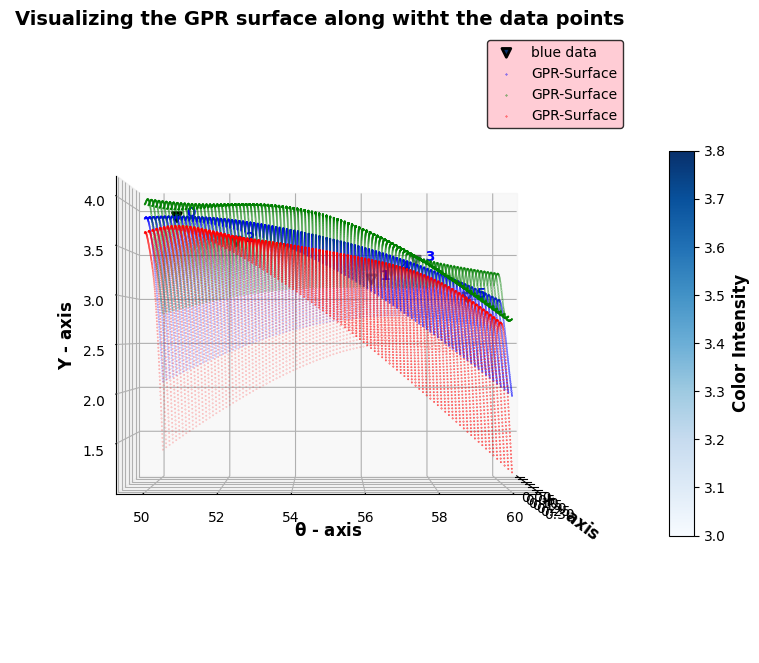

In [216]:
# Preparing the data
xob_train = np.hstack([xb.reshape(-1,1), ob.reshape(-1,1)])
xob_train = np.delete(xob_train,1,axis=0)

# let us scale the data
from sklearn.preprocessing import MinMaxScaler
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import WhiteKernel, RBF

# scaling
Scaler = MinMaxScaler()
Scaler.fit(xob_train)
xob_train_scaled=Scaler.transform(xob_train)
Yb_train = np.delete(Yb,1)

# Applying GPR

## Determining the length scale limits of the kernel functions
lxu,lxl = abs(1.32/((xb[0]-xb[4])/(xb[0]-xb[2]))),abs(0.85/((xb[0]-xb[4])/(xb[0]-xb[2])))
lou , lol= 1.32, 0.85

length_scale_Yxo = [lxu,lou]
length_scalebounds_Yxo = [0.5,1.32]
kernel_Yxo = 1*RBF(length_scale = length_scale_Yxo, length_scale_bounds=length_scalebounds_Yxo) + WhiteKernel(
    noise_level=1e-3, noise_level_bounds=(1e-5, 1e2))
gp_Yxo = GPR(kernel=kernel_Yxo,n_restarts_optimizer=100,random_state=1,optimizer=None)
gp_Yxo.max_iter_predict = 100000000

gp_Yxo.fit(xob_train_scaled,Yb_train )
gp_Yxo.kernel_

# Acessing error for the data
xob_test = np.array([[0.12,56.25]]) # Data corresponding to index point 1
xob_test_scaled = Scaler.transform(xob_test)
Yb_test_mean,Yb_test_std  = gp_Yxo.predict(xob_test_scaled, return_std=True)
error_xob = np.linalg.norm(Yb_test_mean-Yb[1])
print("error=",error_xob)

# Visualising the GPR surface
xb_points = np.linspace(0,0.3,100)
ob_points = np.linspace(50,60,100)
xb_mesh,ob_mesh = np.meshgrid(xb_points,ob_points)
xob_grid =np.hstack([xb_mesh.reshape(-1,1), ob_mesh.reshape(-1,1)])
xob_grid_scaled = Scaler.transform(xob_grid)
Yxob_mean,Yxob_std = gp_Yxo.predict(xob_grid_scaled,return_std=True)

fig = plt.figure(figsize=[10,10])
axs = fig.add_subplot(111,projection="3d")
axs.set_xlabel("$\mathbf{x}$ - axis", fontweight="bold",fontsize=12)
axs.set_ylabel("$\mathbf{\\theta}$ - axis", fontweight = "bold", fontsize=12)
axs.set_zlabel("$\mathbf{Y}$ - axis", fontweight="bold", fontsize=12)
axs.set_title("Visualizing the GPR surface along witht the data points",
              fontweight="bold",
              fontsize=14)

scatter = axs.scatter(xb,ob,Yb,c=Yb,  marker = "v", 
                      edgecolor="k",linewidth=2,s=40, 
                      cmap= "Blues",label= "blue data")
for i, (x, o, Y) in enumerate(zip(xb, ob, Yb)):
    axs.text(x, o, Y, f'  {i}', color='blue', fontsize=10, fontweight='bold')
    
axs.scatter(xob_grid[:,0],xob_grid[:,1], Yxob_mean, c="blue", s = 0.1, label= "GPR-Surface")
axs.scatter(xob_grid[:,0],xob_grid[:,1], Yxob_mean+1.95*Yxob_std, c="green", s = 0.1, label= "GPR-Surface")
axs.scatter(xob_grid[:,0],xob_grid[:,1], Yxob_mean-1.95*Yxob_std, c="red", s = 0.1, label= "GPR-Surface")
legend = axs.legend(loc="best",facecolor="pink", edgecolor="black")
cbar = fig.colorbar(scatter, ax=axs, shrink=0.5, aspect=15)
cbar.set_label('Color Intensity', fontsize=12, fontweight='bold')


axs.view_init(elev=0., azim=0)
plt.show(fig)



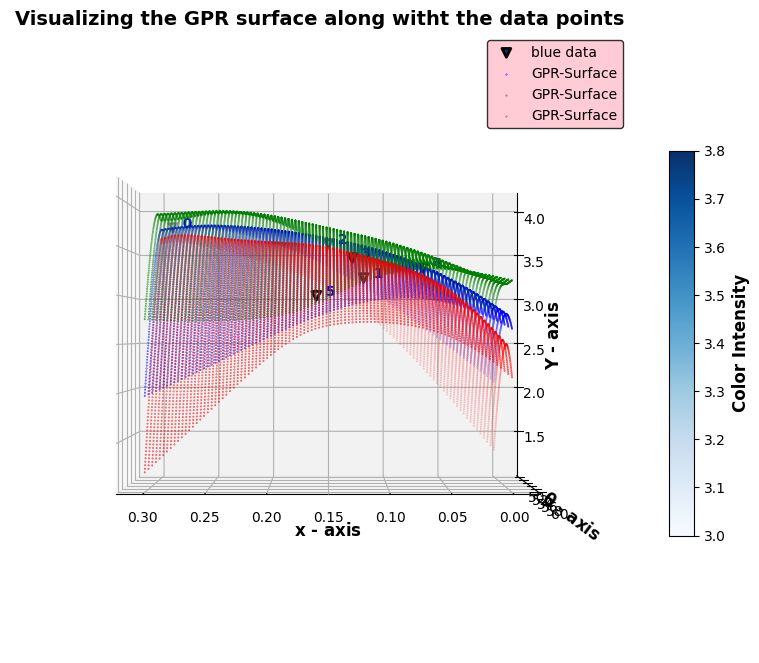

In [218]:
axs.view_init(elev=0., azim=90)
fig

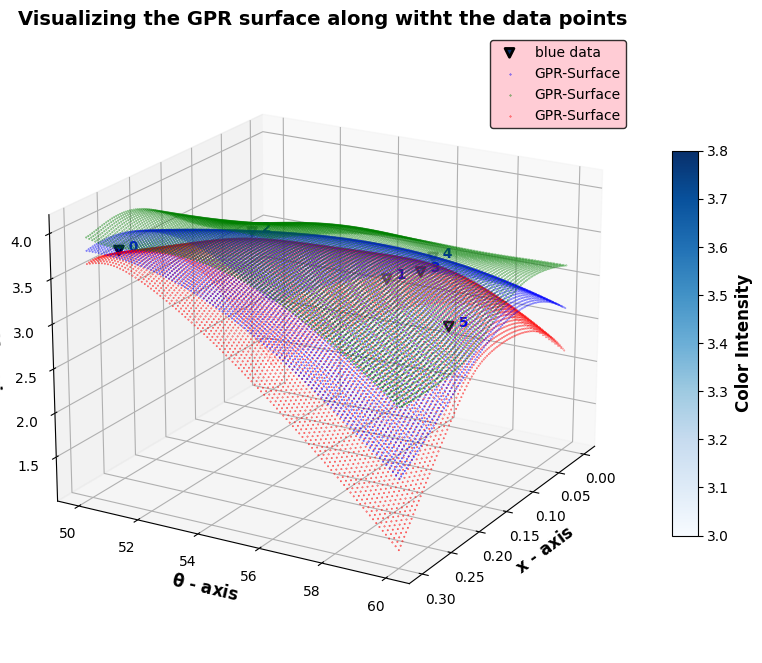

In [219]:
axs.view_init(elev=20,azim=30)
fig

In [229]:
xb_reg = xob_grid[:,0].reshape(-1,1)
ob_reg = xob_grid[:,1].reshape(-1,1)
Yxob_reg = Yxob_mean.reshape(-1,1)
ones_reg = np.ones([np.size(xb_reg),1])

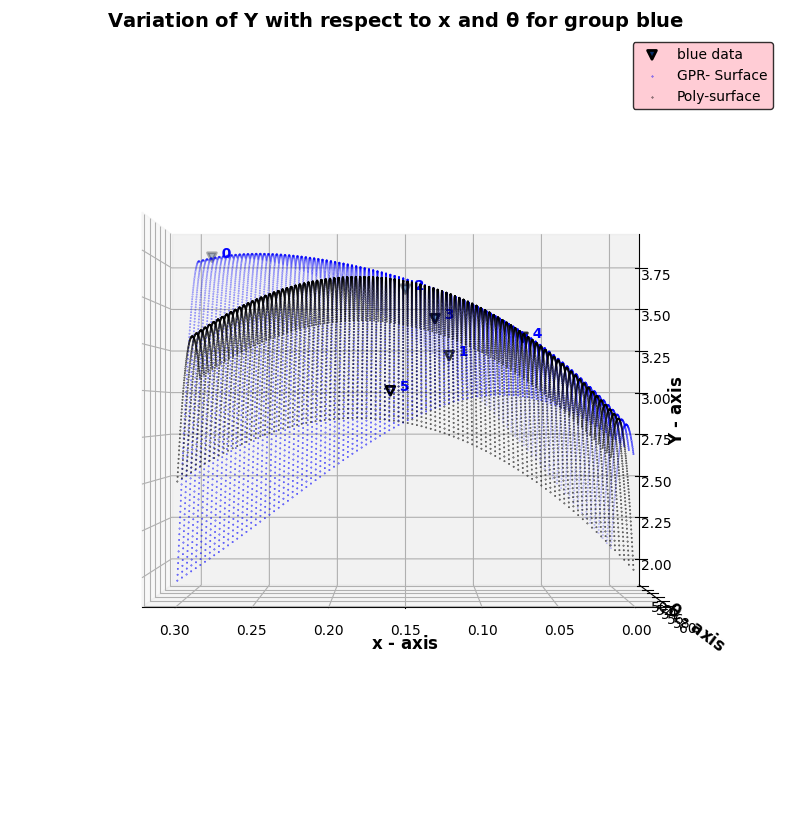

In [221]:
axs.view_init(elev=0., azim=90)
fig

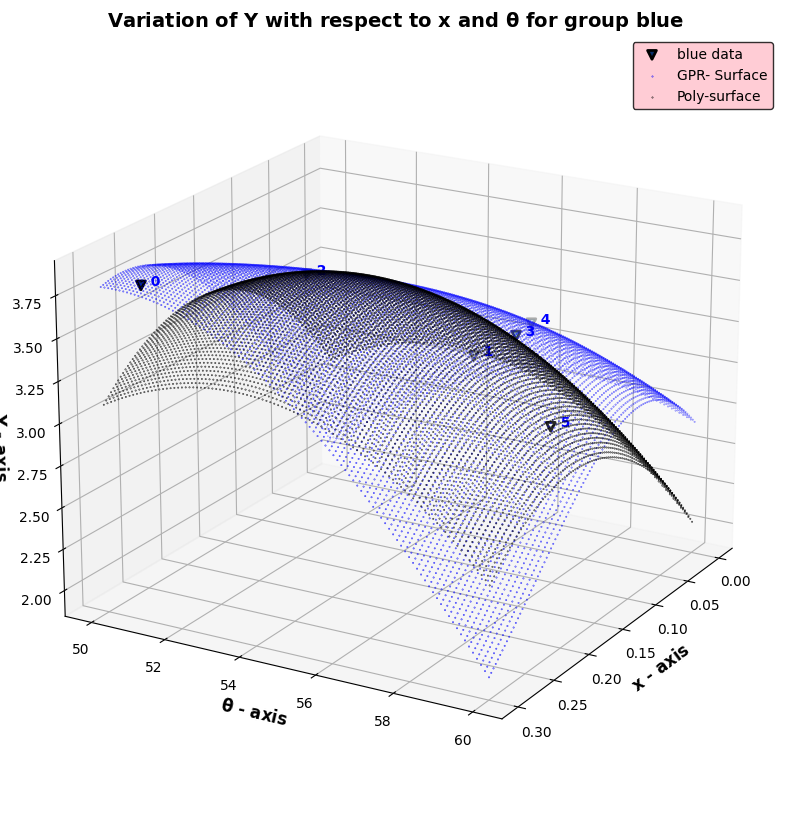

In [222]:
axs.view_init(elev=20,azim=30)
fig

# A Better method
Having done a polynomial regression, we would like to proceed further but in a different way. This method currently I have no proof. But still lets proceed any way. Having the GPR function we would like to do GAM to the function. I have a method in mind. 

## Finding the mean function.

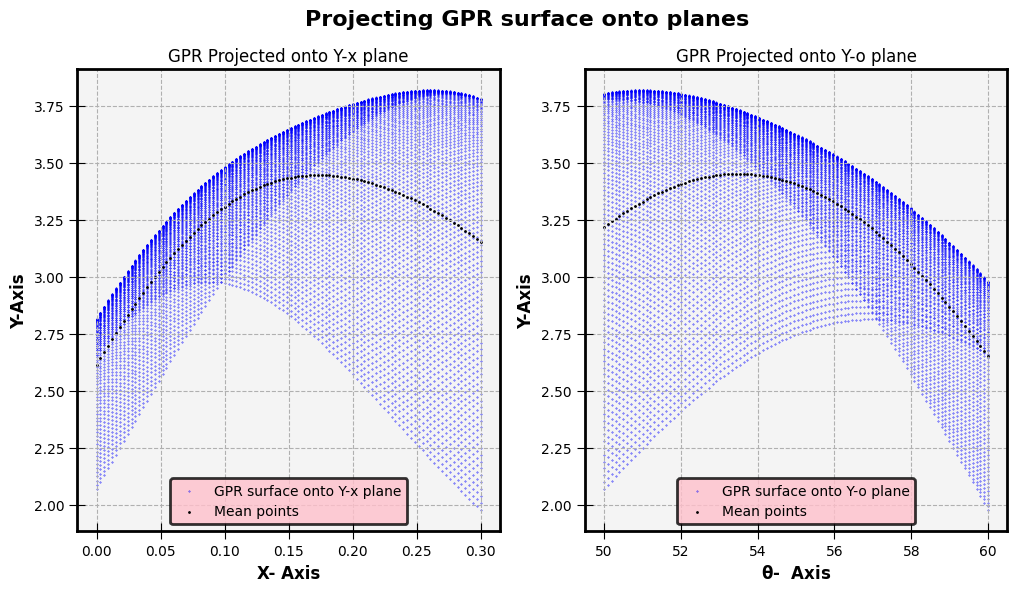

In [223]:
# The points on the GPR are give by the co-ordinates xb_reg,ob_reg,Yxob_reg
## Finding mean 
### Mean by projecting GPR surface onto the Y-xb plane
Yxb_GAM_points = np.zeros([np.size(xb_points)])
count=0
for point in xb_points:
    index = np.where(xb_reg==point)
    Yxb_GAM_points[count] = np.mean(Yxob_reg[index])
    count=count+1
### Mean by projecting GPR surface onto the Y-ob plane
Yob_GAM_points = np.zeros([np.size(ob_points)])
count=0
for point in ob_points:
    index = np.where(ob_reg==point)
    Yob_GAM_points[count] = np.mean(Yxob_reg[index])
    count=count+1

# Plotting 
## Usual Fig start
fig, axs = plt.subplots(1,2,figsize=[12,6])
axs[0].set_xlabel("X- Axis", fontweight="bold", fontsize=12)
axs[1].set_xlabel("$\mathbf{\\theta}$-  Axis", fontweight= "bold", fontsize="12")
fig.suptitle("Projecting GPR surface onto planes",fontweight="bold",fontsize=16)
axs[0].set_title("GPR Projected onto Y-x plane")
axs[1].set_title("GPR Projected onto Y-o plane")
## Actual Plots
### Projecting the GPR surface onto the xb-Axis
axs[0].scatter(xb_reg,Yxob_reg,c="b",s=0.1,label="GPR surface onto Y-x plane")
### Projecting the GPR surface onto the ob-Axis
axs[1].scatter(ob_reg,Yxob_reg,c="b",s=0.1,label="GPR surface onto Y-o plane")
### Plotting the mean onto Y-xb plane
axs[0].scatter(xb_points,Yxb_GAM_points,c="k",s=1,label="Mean points")
### Plotting the mean onto Y-xb plane
axs[1].scatter(ob_points,Yob_GAM_points,c="k",s=1,label="Mean points")
## Usual figure repetitive stuff
for i in [0,1]:
    axs[i].set_ylabel("Y-Axis", fontweight="bold", fontsize=12)
    axs[i].set_facecolor("#f4f4f4")
    axs[i].grid(True, linestyle="--")
    legend = axs[i].legend(loc="best",facecolor="pink",edgecolor="k")
    legend.get_frame().set_linewidth(2)
    axs[i].tick_params(direction="inout", size=12)
    for spine_value in axs[i].spines.keys():
        axs[i].spines[spine_value].set_linewidth(2)

# Interpolating the mean function using GPR.
We have nx = np.size(xb_points)=100. But we know for better interpolation the lengthscale for performing GPR should be such that 0.85<(n-1)l<1.32 approximately can be written as 0.85<nl<1.32 for larger values of n. Therefore the length scale we are gonna choose is between [0.0085, 0.0132].

In [224]:

# Y-xb plane
## Scaling the data
xb_Scaler = MinMaxScaler()
xb_Scaler.fit(xb_points.reshape(-1,1))
xb_points_scaled = xb_Scaler.transform(xb_points.reshape(-1,1))

## Performing GPR on Y-xb plane
### (xb_points,Yxb_GAM_points) are our training data for GPR interpolation
kernel=RBF(length_scale=0.0132,length_scale_bounds=[0.0085,1])
gp_Yxb_mean = GPR(kernel=kernel,optimizer=None,n_restarts_optimizer=10)
#gp_Yxb_mean.max_iter_predict = 1000
gp_Yxb_mean.fit(xb_points_scaled,Yxb_GAM_points)

# Y-ob plane
## Scaling the data
ob_Scaler = MinMaxScaler()
ob_Scaler.fit(ob_points.reshape(-1,1))
ob_points_scaled = ob_Scaler.transform(ob_points.reshape(-1,1))

## Performing GPR on Y-xb plane
### (o_reg,Yob_GAM_points) are our training data for GPR interpolation
kernel=RBF(length_scale=0.0132,length_scale_bounds=[0.0085,1])
gp_Yob_mean = GPR(kernel=kernel,optimizer=None,n_restarts_optimizer=10)
#gp_Yxb_mean.max_iter_predict = 1000
gp_Yob_mean.fit(ob_points_scaled,Yob_GAM_points)


GaussianProcessRegressor(kernel=RBF(length_scale=0.0132),
                         n_restarts_optimizer=10, optimizer=None)

# Doing regression on the obtained GPR functions

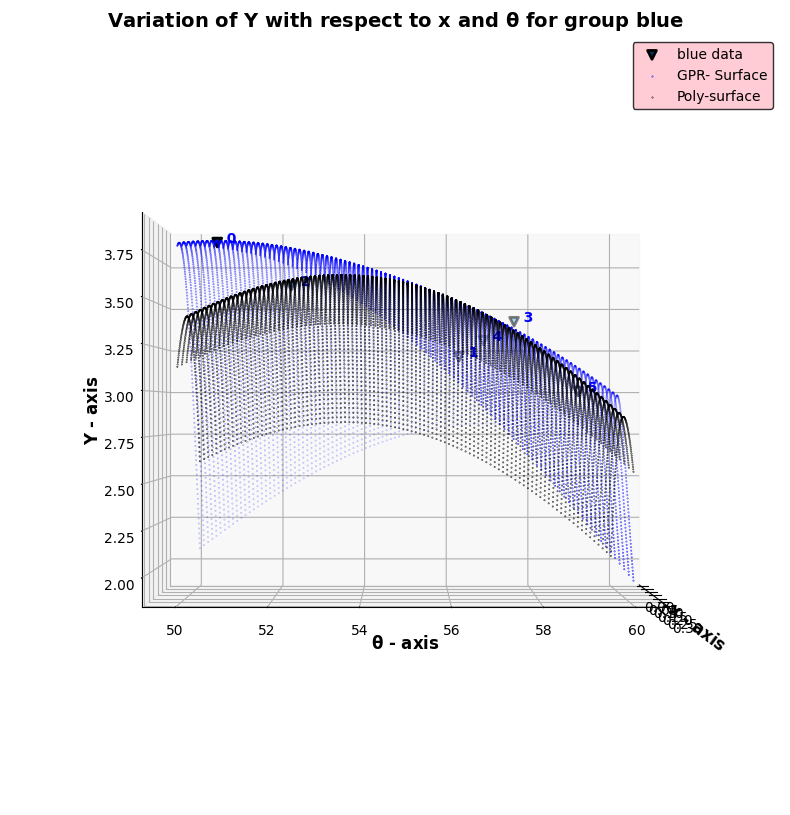

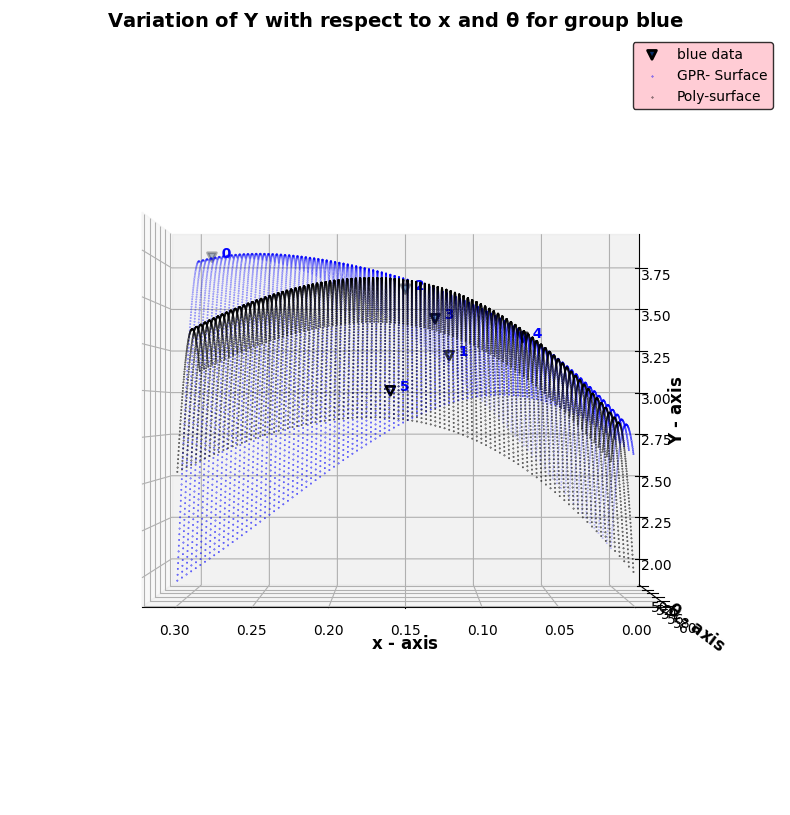

In [227]:
axs.view_init(elev=0., azim=90)
fig

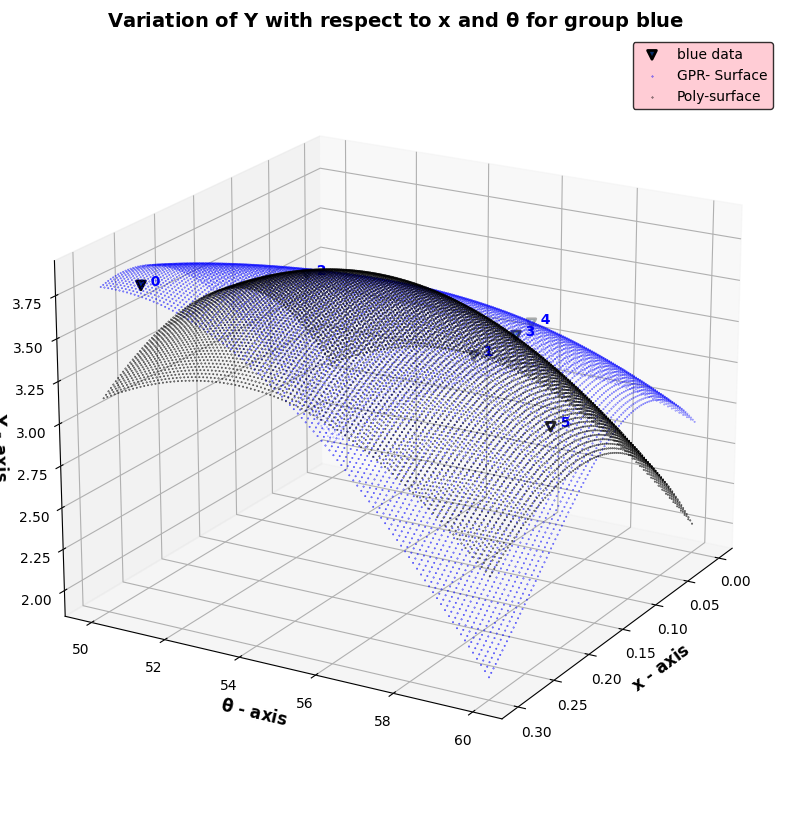

In [228]:
axs.view_init(elev=20,azim=30)
fig

# Poly_GAM

In [ ]:
xb_reg

In [ ]:
# Regression:
## [x^2,x,o^2,o,1]

matrixreg = np.hstack([xb_reg**2,xb_reg,ob_reg**2,ob_reg,ones_reg])
pinv_matrixreg = np.linalg.pinv(matrixreg)
coefficients = np.matmul(pinv_matrixreg,Yxob_reg) 
coefficients = coefficients.reshape(1,-1)[0]
a,b,c,d,e = coefficients
Yxob_poly = a * xb_reg**2 + b * xb_reg + c*ob_reg**2 + d*ob_reg + e*ones_reg

# Visulaizing the GPR curves
fig = plt.figure(figsize=[10,10])
axs = fig.add_subplot(111,projection="3d")
axs.set_xlabel("$\mathbf{x}$ - axis", fontweight="bold",fontsize=12)
axs.set_ylabel("$\mathbf{\\theta}$ - axis", fontweight = "bold", fontsize=12)
axs.set_zlabel("$\mathbf{Y}$ - axis", fontweight="bold", fontsize=12)
axs.set_title("Variation of $\mathbf{Y}$ with respect to $\mathbf{x}$ and $\mathbf{\\theta}$ for group blue",
              fontweight="bold",
              fontsize=14)

scatter = axs.scatter(xb,ob,Yb,c=Yb,  marker = "v", edgecolor="k",linewidth=2,s=40, cmap= "Blues",label= "blue data" )
for i, (x, o, Y) in enumerate(zip(xb, ob, Yb)):
    axs.text(x, o, Y, f'  {i}', color='blue', fontsize=10, fontweight='bold')

axs.scatter(xob_grid[:,0],xob_grid[:,1], Yxob_mean, c="blue", s = 0.1, label = "GPR- Surface")

axs.scatter(xb_reg,ob_reg, Yxob_poly, c="k", s = 0.1, alpha=1, label="Poly-surface")
legend = axs.legend(loc="best",facecolor="pink", edgecolor="black")
# cbar = fig.colorbar(scatter, ax=axs, shrink=0.5, aspect=15)
# cbar.set_label('Color Intensity', fontsize=12, fontweight='bold')


axs.view_init(elev=0., azim=0)


# Error analysis between GPR_GAM and Poly_GAM

## Initial Analysis of the data

### Plots
Let us observe if there is any pattern in the data with the following graphs.
We will plot 
- Hardening co-efficeint (Y) vs distance(x)
- Hardening co-efficeint (Y) vs misorientation angle (o)
- Yield strength (Y) vs distance(x)
- Yield strength (Y) vs misorientation angle (o).

Now Let us see how these plots look like.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


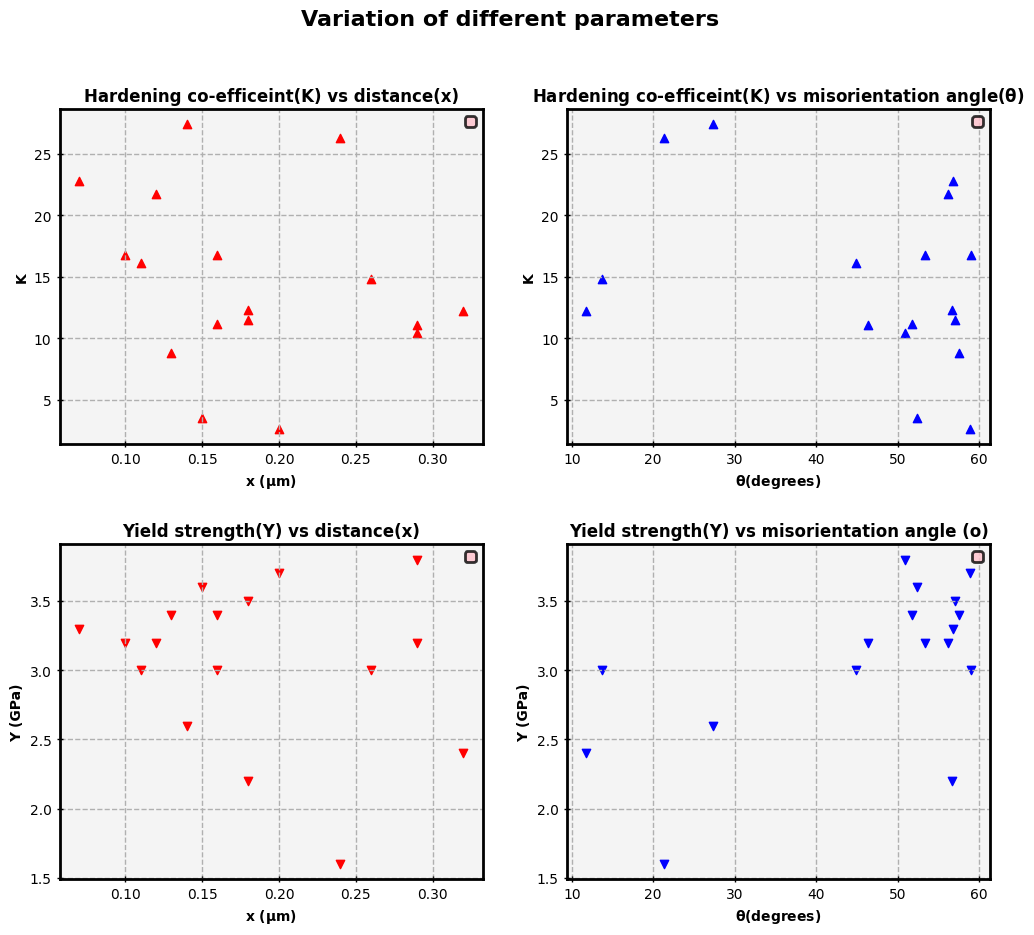

In [5]:
fig, axs = plt.subplots(2,2,figsize=(12,10))

fig.suptitle("Variation of different parameters", fontweight="bold", fontsize=16)

axs[0,0].set_title("Hardening co-efficeint(Y) vs distance(x)", fontweight="bold", fontsize=12)
axs[0,1].set_title("Hardening co-efficeint(Y) vs misorientation angle($\mathbf{\\theta}$)", fontweight="bold", fontsize=12)
axs[1,0].set_title("Yield strength(Y) vs distance(x)", fontweight="bold", fontsize=12)
axs[1,1].set_title("Yield strength(Y) vs misorientation angle (o)", fontweight="bold", fontsize=12)

axs[0,0].set_xlabel("x ($\mathbf{\mu m}$)", fontweight="bold", fontsize=10)
axs[0,1].set_xlabel("$\mathbf{\\theta}$(degrees)", fontweight="bold", fontsize=10)
axs[1,0].set_xlabel("x ($\mathbf{\mu m}$)", fontweight="bold", fontsize=10)
axs[1,1].set_xlabel("$\mathbf{\\theta}$(degrees)", fontweight="bold", fontsize=10)

axs[0,0].set_ylabel("Y", fontweight="bold", fontsize=10)
axs[0,1].set_ylabel("Y", fontweight="bold", fontsize=10)
axs[1,0].set_ylabel("Y (GPa)", fontweight="bold", fontsize=10)
axs[1,1].set_ylabel("Y (GPa)", fontweight="bold", fontsize=10)

axs[0,0].scatter(x,Y,color="red",marker="^")
axs[0,1].scatter(o,Y,color="blue",marker="^")
axs[1,0].scatter(x,Y,color="red",marker="v")
axs[1,1].scatter(o,Y,color="blue",marker="v")

#common aspects
for axs_num1 in [0,1]:
    for axs_num2 in [0,1]:
        temp = (axs_num1,axs_num2)
        axs[temp].grid("on",linestyle="--",linewidth=1)
        #axs[temp].set_aspect("equal")
        #axs[temp].axis("equal")
        axs[temp].set_facecolor("#f4f4f4")
        legend = axs[temp].legend(loc="best",fontsize=10)
        legend.get_frame().set_linewidth(2)
        legend.get_frame().set_edgecolor("black")
        legend.get_frame().set_facecolor("pink")
        spines_dict = ["top","bottom","left","right"]
        for spine_value in spines_dict:
            axs[temp].spines[spine_value].set_linewidth(2)
        axs[temp].tick_params(axis="both",direction="inout", length=5, width=1,labelsize=10)

plt.subplots_adjust(hspace=0.3) 

filename = os.path.join(output_path,"data.pdf")
#plt.savefig(filename)

plt.show()

# GPR for the data
We want to see what the results will be for different GPRs.
1. GPR between Y and x
2. GPR between Y and o
3. GPR between Y and x,o
4. GPR between Y and x
5. GPR between Y and o
6. GPR between Y and x,o

But before doing anything let us initially scale our data appropriately.

In [6]:
from sklearn.preprocessing import MinMaxScaler

# scaling the x data
x_scaled = np.array([x])
x_scaled = np.transpose(x_scaled)
x_scaler = MinMaxScaler()
x_scaler.fit(x_scaled)
x_scaled = x_scaler.transform(x_scaled)

# scaling the o data
o_scaled = np.array([o])
o_scaled = np.transpose(o_scaled)
o_scaler = MinMaxScaler()
o_scaler.fit(o_scaled)
o_scaled = o_scaler.transform(o_scaled)

## GPR_Yx

In [7]:
from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF,WhiteYernel

length_scale_Yx = [1e6]
length_scalebounds_Yx = [1e-9, 1e9]
kernel_Yx = 1*RBF(length_scale = length_scale_Yx, length_scalebounds=length_scalebounds_Yx) + WhiteYernel(
    noise_level=0.05, noise_levelbounds=(1e-5, 1e2))
gp_Yx = GPR(kernel=kernel_Yx,n_restarts_optimizer=100,random_state=1)
gp_Yx.max_iter_predict = 100000000

x_train = x_scaled
y_train = Y

gp_Yx.fit(x_train, y_train)
gp_Yx.kernel_

14.4**2 * RBF(length_scale=11.5) + WhiteKernel(noise_level=49.1)

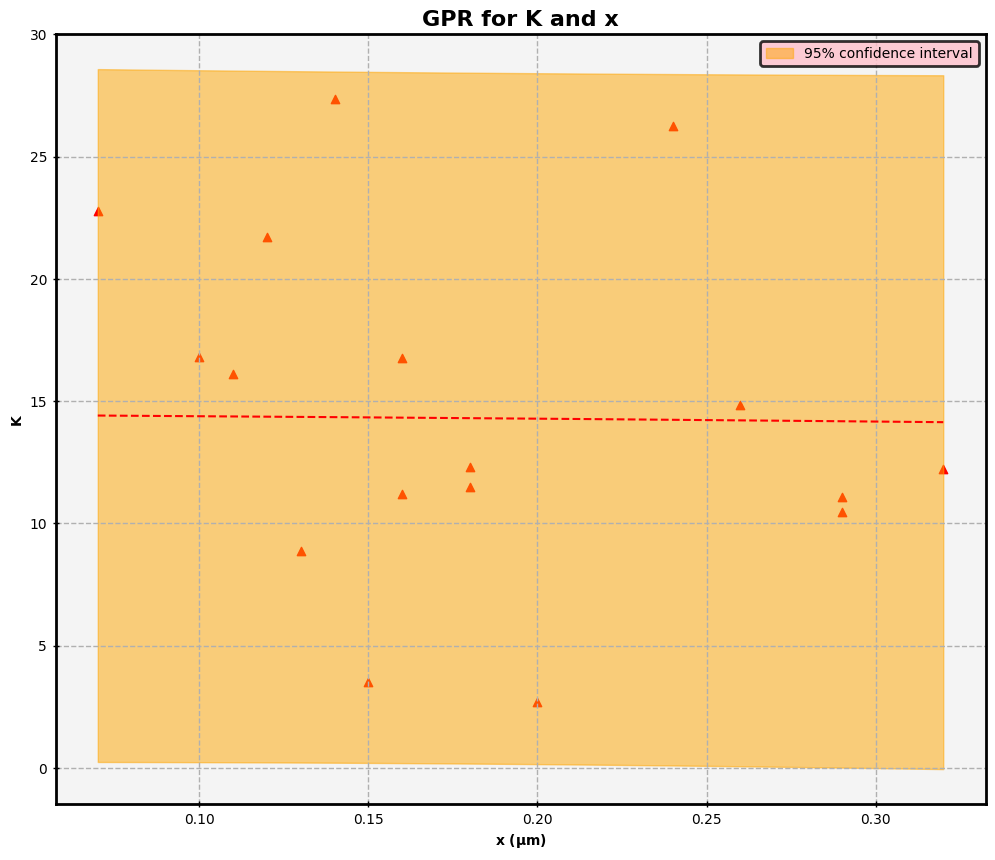

In [8]:
x_test = np.linspace(0,1,1000)
x_test = np.array([x_test])
x_test = np.transpose(x_test)
y_test_mean, y_test_std=gp_Yx.predict(x_test,return_std=True)

## Change here
x_test_plot = x_scaler.inverse_transform(x_test)

#Plots
fig, axs = plt.subplots(1,1,figsize=(12,10))

axs.set_title("GPR for Y and x", fontweight="bold", fontsize=16)

axs.set_xlabel("x ($\mathbf{\mu m}$)", fontweight="bold", fontsize=10)

axs.set_ylabel("Y", fontweight="bold", fontsize=10)

axs.scatter(x,Y,color="red",marker="^")
axs.plot(x_test_plot,y_test_mean,"r--")
axs.fillbetween(
    x_test_plot.ravel(),
    y_test_mean - 1.96 * y_test_std,
    y_test_mean + 1.96 * y_test_std,
    alpha=0.5,
    color= "orange",
    label=r"95% confidence interval",
)


#common aspects

axs.grid("on",linestyle="--",linewidth=1)
#axs.set_aspect("equal")
#axs.axis("equal")
axs.set_facecolor("#f4f4f4")
legend = axs.legend(loc="best",fontsize=10)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor("black")
legend.get_frame().set_facecolor("pink")
spines_dict = ["top","bottom","left","right"]
for spine_value in spines_dict:
    axs .spines[spine_value].set_linewidth(2)
axs .tick_params(axis="both",direction="inout", length=5, width=1,labelsize=10)

plt.subplots_adjust(hspace=0.3)

filename = os.path.join(output_path,"GPR_Y_x.pdf")
#plt.savefig(filename)
plt.show()

## GP_Yo

In [9]:
x_train = o_scaled
y_train = Y

length_scale_Yo = [1e1]
length_scalebounds_Yo = [1e-9, 1e9]
kernel_Yo = 1*RBF(length_scale = length_scale_Yo, length_scalebounds=length_scalebounds_Yo)+ WhiteYernel(
    noise_level=0.05, noise_levelbounds=(1e-5, 1e2))
gp_Yo = GPR(kernel=kernel_Yo,n_restarts_optimizer=100,random_state=1)
gp_Yo.max_iter_predict = 100000000

gp_Yo.fit(x_train, y_train)
gp_Yo.kernel_

14.5**2 * RBF(length_scale=2.41) + WhiteKernel(noise_level=45.7)

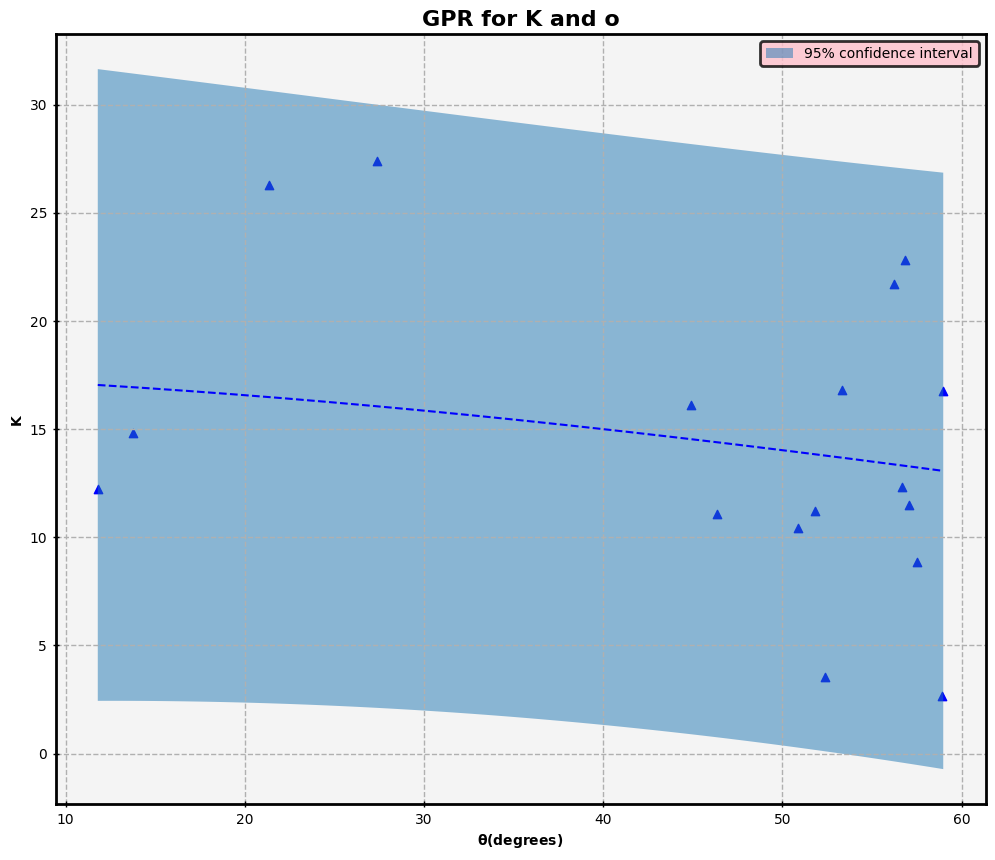

In [10]:
x_test = np.linspace(0,1,1000)
x_test = np.array([x_test])
x_test = np.transpose(x_test)
y_test_mean, y_test_std=gp_Yo.predict(x_test,return_std=True)

## Change here
x_test_plot = o_scaler.inverse_transform(x_test)

#Plots
fig, axs = plt.subplots(1,1,figsize=(12,10))

axs.set_title("GPR for Y and o", fontweight="bold", fontsize=16)

axs.set_xlabel("$\mathbf{\\theta}$(degrees)", fontweight="bold", fontsize=10)

axs.set_ylabel("Y", fontweight="bold", fontsize=10)

axs.scatter(o,Y,color="blue",marker="^")
axs.plot(x_test_plot,y_test_mean,"b--")
axs.fillbetween(
    x_test_plot.ravel(),
    y_test_mean - 1.96 * y_test_std,
    y_test_mean + 1.96 * y_test_std,
    alpha=0.5,
    label=r"95% confidence interval",
)


#common aspects

axs.grid("on",linestyle="--",linewidth=1)
#axs.set_aspect("equal")
#axs.axis("equal")
axs.set_facecolor("#f4f4f4")
legend = axs.legend(loc="best",fontsize=10)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor("black")
legend.get_frame().set_facecolor("pink")
spines_dict = ["top","bottom","left","right"]
for spine_value in spines_dict:
    axs .spines[spine_value].set_linewidth(2)
axs .tick_params(axis="both",direction="inout", length=5, width=1,labelsize=10)

plt.subplots_adjust(hspace=0.3) 

#filename = os.path.join(output_path,"GPR_Y_o.pdf")
plt.savefig(filename)
plt.show()

## GP_Yxo

In [11]:
x_train = np.hstack([x_scaled,o_scaled])
y_train = Y

length_scale_Yxo = [1e-6,1e-6]
length_scalebounds_Yxo = [1e-9, 1e9]
kernel_Yxo = 1*RBF(length_scale = length_scale_Yxo, length_scalebounds=length_scalebounds_Yxo)+ WhiteYernel(
    noise_level=1e-4, noise_levelbounds=(1e-5, 1e2))
gp_Yxo = GPR(kernel=kernel_Yxo,n_restarts_optimizer=100,random_state=1)
gp_Yxo.max_iter_predict = 100000000

gp_Yxo.fit(x_train, y_train)
gp_Yxo.kernel_

17.2**2 * RBF(length_scale=[1.59, 1.29]) + WhiteKernel(noise_level=33.1)

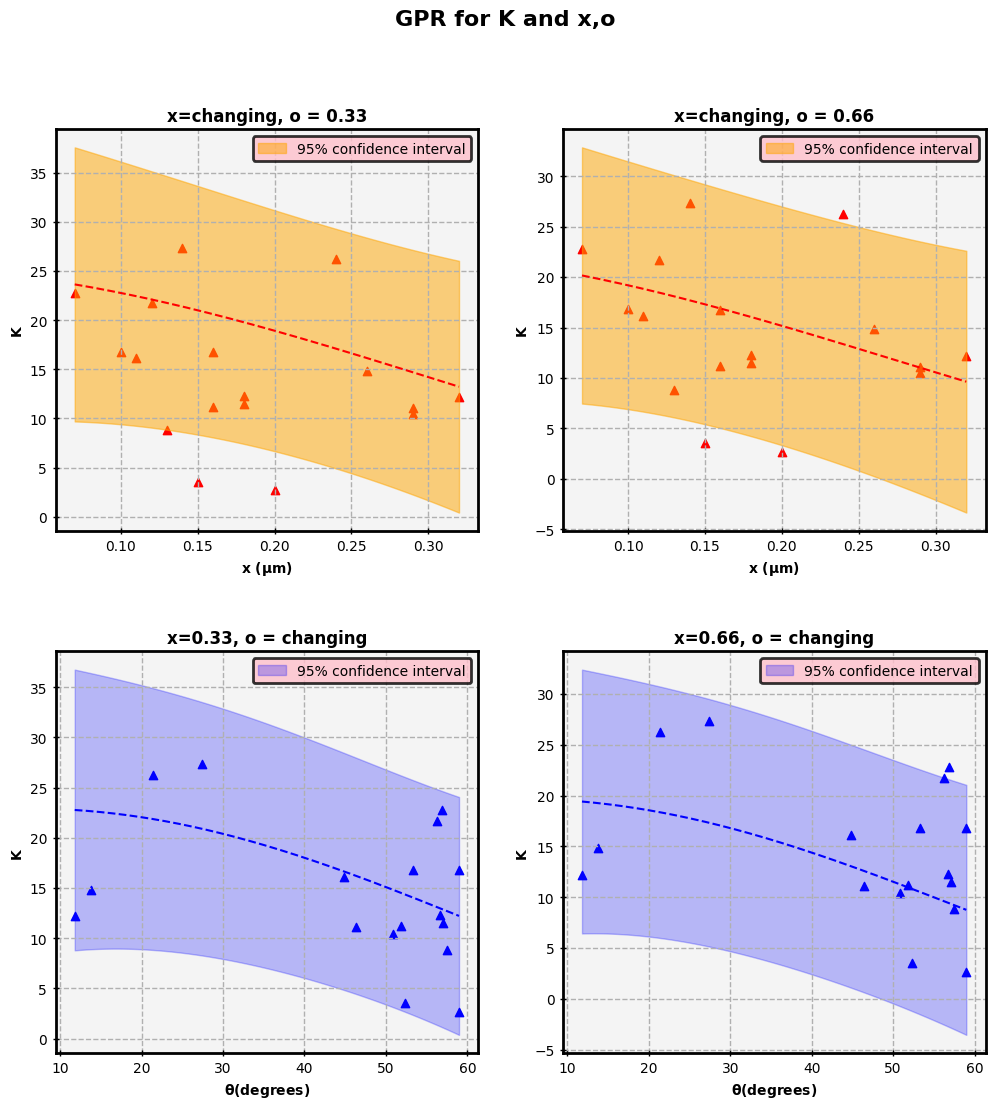

In [31]:
x_test = np.linspace(0,1,1000)
x_test = np.array([x_test])
x_test = np.transpose(x_test)

temp = np.transpose(np.array([np.ones(x_test.size)]))
x_test_33e2 = temp *0.33
x_test_66e2 = temp *0.66

x_test_xv_o33e2 = np.hstack([x_test,x_test_33e2])
x_test_xv_o66e2 = np.hstack([x_test,x_test_66e2])

x_test_x33e2_ov = np.hstack([x_test_33e2,x_test])
x_test_x66e2_ov = np.hstack([x_test_66e2,x_test])

y_test_mean_xv_o33e2, y_test_std_xv_o33e2 = gp_Yxo.predict(x_test_xv_o33e2,return_std=True)
y_test_mean_xv_o66e2, y_test_std_xv_o66e2 = gp_Yxo.predict(x_test_xv_o66e2,return_std=True)
y_test_mean_x33e2_ov, y_test_std_x33e2_ov = gp_Yxo.predict(x_test_x33e2_ov,return_std=True)
y_test_mean_x66e2_ov, y_test_std_x66e2_ov = gp_Yxo.predict(x_test_x66e2_ov,return_std=True)


x_test_xv_plot = x_scaler.inverse_transform(x_test)
# x_test_x33e2_plot = x_scaler.inverse_transform(x_test_33e2)
# x_test_x66e2_plot = x_scaler.inverse_transform(x_test_66e2)

x_test_ov_plot = o_scaler.inverse_transform(x_test)
# x_test_o33e2_plot = o_scaler.inverse_transform(x_test_33e2)
# x_test_o66e2_plot = o_scaler.inverse_transform(x_test_66e2)

# x_test_xv_o33e2_plot = np.hstack([x_test_xv_plot,x_test_o33e2_plot])
# x_test_xv_o66e2_plot = np.hstack([x_test_xv_plot,x_test_o66e2_plot])
                    
# x_test_x33e2_ov_plot = np.hstack([x_test_x33e2_plot,x_test_ov_plot])
# x_test_x66e2_ov_plot = np.hstack([x_test_x66e2_plot,x_test_ov_plot])

#Plots
fig, axs = plt.subplots(2,2,figsize=(12,12))
fig.suptitle("GPR for Y and x,o", fontweight="bold", fontsize=16)

axs[0,0].set_title("x=changing, o = 0.33", fontweight="bold", fontsize=12)
axs[0,0].set_xlabel("x ($\mathbf{\mu m}$)", fontweight="bold", fontsize=10)
axs[0,0].set_ylabel("Y", fontweight="bold", fontsize=10)
axs[0,0].scatter(x,Y,color="red",marker="^")
axs[0,0].plot(x_test_xv_plot,y_test_mean_xv_o33e2,"r--")
axs[0,0].fillbetween(
    x_test_xv_plot.ravel(),
    y_test_mean_xv_o33e2 - 1.96 * y_test_std_xv_o33e2,
    y_test_mean_xv_o33e2 + 1.96 * y_test_std_xv_o33e2,
    alpha=0.5,
    label=r"95% confidence interval",
    color="orange"
)

axs[0,1].set_title("x=changing, o = 0.66", fontweight="bold", fontsize=12)
axs[0,1].set_xlabel("x ($\mathbf{\mu m}$)", fontweight="bold", fontsize=10)
axs[0,1].set_ylabel("Y", fontweight="bold", fontsize=10)
axs[0,1].scatter(x,Y,color="red",marker="^")
axs[0,1].plot(x_test_xv_plot,y_test_mean_xv_o66e2,"r--")
axs[0,1].fillbetween(
    x_test_xv_plot.ravel(),
    y_test_mean_xv_o66e2 - 1.96 * y_test_std_xv_o66e2,
    y_test_mean_xv_o66e2 + 1.96 * y_test_std_xv_o66e2,
    alpha=0.5,
    label=r"95% confidence interval",
    color="orange"
)

axs[1,0].set_title("x=0.33, o = changing", fontweight="bold", fontsize=12)
axs[1,0].set_xlabel("$\mathbf{\\theta}$(degrees)", fontweight="bold", fontsize=10)
axs[1,0].set_ylabel("Y", fontweight="bold", fontsize=10)
axs[1,0].scatter(o,Y,color="blue",marker="^")
axs[1,0].plot(x_test_ov_plot,y_test_mean_x33e2_ov,"b--")
axs[1,0].fillbetween(
    x_test_ov_plot.ravel(),
    y_test_mean_x33e2_ov - 1.96 * y_test_std_x33e2_ov,
    y_test_mean_x33e2_ov + 1.96 * y_test_std_x33e2_ov,
    alpha=0.25,
    label=r"95% confidence interval",
    color="blue"
)

axs[1,1].set_title("x=0.66, o = changing", fontweight="bold", fontsize=12)
axs[1,1].set_xlabel("$\mathbf{\\theta}$(degrees)", fontweight="bold", fontsize=10)
axs[1,1].set_ylabel("Y", fontweight="bold", fontsize=10)
axs[1,1].scatter(o,Y,color="blue",marker="^")
axs[1,1].plot(x_test_ov_plot,y_test_mean_x66e2_ov,"b--")
axs[1,1].fillbetween(
    x_test_ov_plot.ravel(),
    y_test_mean_x66e2_ov - 1.96 * y_test_std_x66e2_ov,
    y_test_mean_x66e2_ov + 1.96 * y_test_std_x66e2_ov,
    alpha=0.25,
    label=r"95% confidence interval",
    color="blue"
)

#common aspects
for axs_num1 in [0,1]:
    for axs_num2 in [0,1]:
        temp = (axs_num1,axs_num2)
        axs[temp].grid("on",linestyle="--",linewidth=1)
        #axs[temp].set_aspect("equal")
        #axs[temp].axis("equal")
        axs[temp].set_facecolor("#f4f4f4")
        legend = axs[temp].legend(loc="best",fontsize=10)
        legend.get_frame().set_linewidth(2)
        legend.get_frame().set_edgecolor("black")
        legend.get_frame().set_facecolor("pink")
        spines_dict = ["top","bottom","left","right"]
        for spine_value in spines_dict:
            axs[temp].spines[spine_value].set_linewidth(2)
        axs[temp].tick_params(axis="both",direction="inout", length=5, width=1,labelsize=10)

plt.subplots_adjust(hspace=0.3) 

filename = os.path.join(output_path,"GPR_Y_xo.pdf")
#plt.savefig(filename)
plt.show()

In [23]:
y_test_mean_x33e2_ov

array([22.76953829, 22.76710546, 22.76465257, 22.76217963, 22.75968664,
       22.75717361, 22.75464053, 22.7520874 , 22.74951422, 22.746921  ,
       22.74430774, 22.74167444, 22.73902109, 22.7363477 , 22.73365428,
       22.73094082, 22.72820732, 22.72545379, 22.72268022, 22.71988662,
       22.717073  , 22.71423934, 22.71138566, 22.70851195, 22.70561822,
       22.70270447, 22.6997707 , 22.69681691, 22.6938431 , 22.69084928,
       22.68783545, 22.68480161, 22.68174776, 22.6786739 , 22.67558004,
       22.67246618, 22.66933232, 22.66617847, 22.66300462, 22.65981078,
       22.65659695, 22.65336313, 22.65010933, 22.64683554, 22.64354178,
       22.64022804, 22.63689433, 22.63354064, 22.63016699, 22.62677338,
       22.6233598 , 22.61992626, 22.61647277, 22.61299932, 22.60950592,
       22.60599258, 22.60245929, 22.59890606, 22.5953329 , 22.5917398 ,
       22.58812678, 22.58449382, 22.58084094, 22.57716814, 22.57347543,
       22.5697628 , 22.56603027, 22.56227783, 22.55850549, 22.55

## GP_Yx

In [13]:
x_train = x_scaled
y_train = Y

length_scale_Yx = [1e-8]
length_scalebounds_Yx = [1e-9, 1e9]
kernel_Yx = 1*RBF(length_scale = length_scale_Yx, length_scalebounds=length_scalebounds_Yx)+WhiteYernel(
    noise_level=0.05, noise_levelbounds=(1e-5, 1e2))
gp_Yx = GPR(kernel=kernel_Yx,n_restarts_optimizer=100,random_state=1)
gp_Yx.max_iter_predict = 100000000

gp_Yx.fit(x_train, y_train)
gp_Yx.kernel_

3.06**2 * RBF(length_scale=2.58e+08) + WhiteKernel(noise_level=0.332)

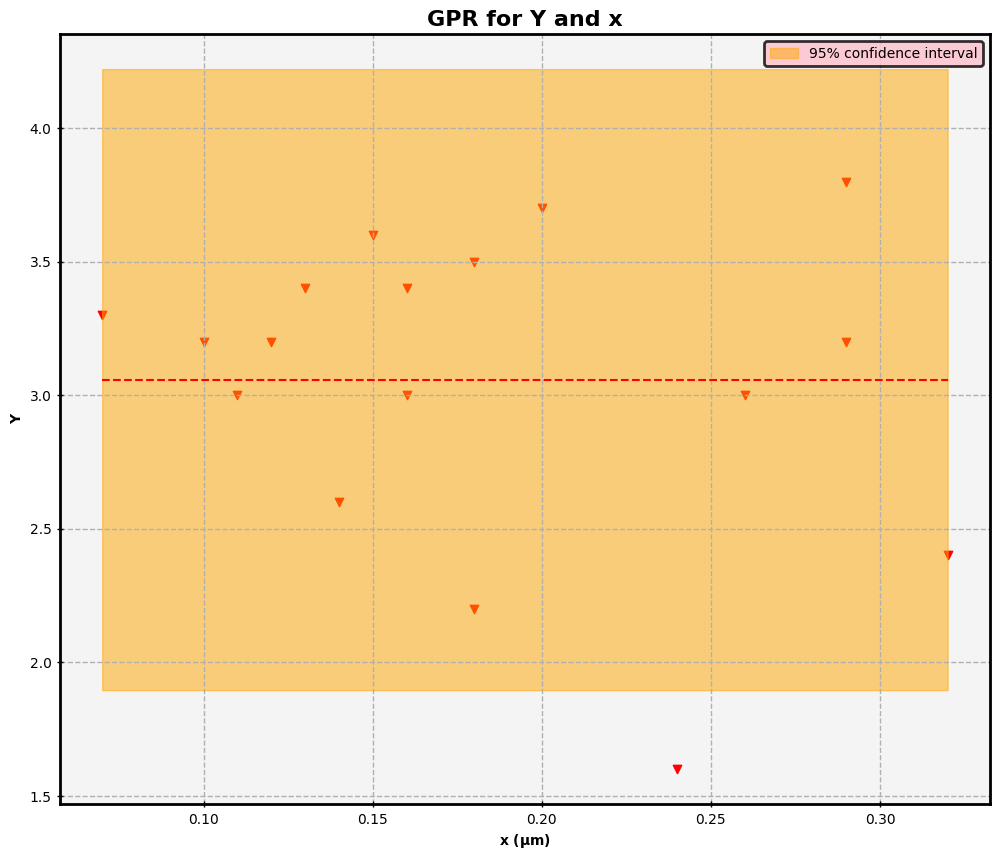

In [14]:
x_test = np.linspace(0,1,1000)
x_test = np.array([x_test])
x_test = np.transpose(x_test)
y_test_mean, y_test_std=gp_Yx.predict(x_test,return_std=True)

## Change here
x_test_plot = x_scaler.inverse_transform(x_test)

#Plots
fig, axs = plt.subplots(1,1,figsize=(12,10))

axs.set_title("GPR for Y and x", fontweight="bold", fontsize=16)

axs.set_xlabel("x ($\mathbf{\mu m}$)", fontweight="bold", fontsize=10)

axs.set_ylabel("Y", fontweight="bold", fontsize=10)

axs.scatter(x,Y,color="red",marker="v")
axs.plot(x_test_plot,y_test_mean,"r--")
axs.fillbetween(
    x_test_plot.ravel(),
    y_test_mean - 1.96 * y_test_std,
    y_test_mean + 1.96 * y_test_std,
    alpha=0.5,
    label=r"95% confidence interval",
    color="orange"
)


#common aspects

axs.grid("on",linestyle="--",linewidth=1)
#axs.set_aspect("equal")
#axs.axis("equal")
axs.set_facecolor("#f4f4f4")
legend = axs.legend(loc="best",fontsize=10)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor("black")
legend.get_frame().set_facecolor("pink")
spines_dict = ["top","bottom","left","right"]
for spine_value in spines_dict:
    axs .spines[spine_value].set_linewidth(2)
axs .tick_params(axis="both",direction="inout", length=5, width=1,labelsize=10)

plt.subplots_adjust(hspace=0.3) 

filename = os.path.join(output_path,"GPR_Y_x.pdf")
#plt.savefig(filename)
plt.show()

## GP_Yo

In [15]:
x_train = o_scaled
y_train = Y

length_scale_Yo = [1e-4]
length_scalebounds_Yo = [1e-9, 1e9]
kernel_Yo = 1*RBF(length_scale = length_scale_Yo, length_scalebounds=length_scalebounds_Yo)+ WhiteYernel(
    noise_level=0.05, noise_levelbounds=(1e-5, 1e5))
gp_Yo = GPR(kernel=kernel_Yo,n_restarts_optimizer=100,random_state=1)
gp_Yo.max_iter_predict = 100000000

gp_Yo.fit(x_train, y_train)
gp_Yo.kernel_

2.94**2 * RBF(length_scale=3.13) + WhiteKernel(noise_level=0.226)

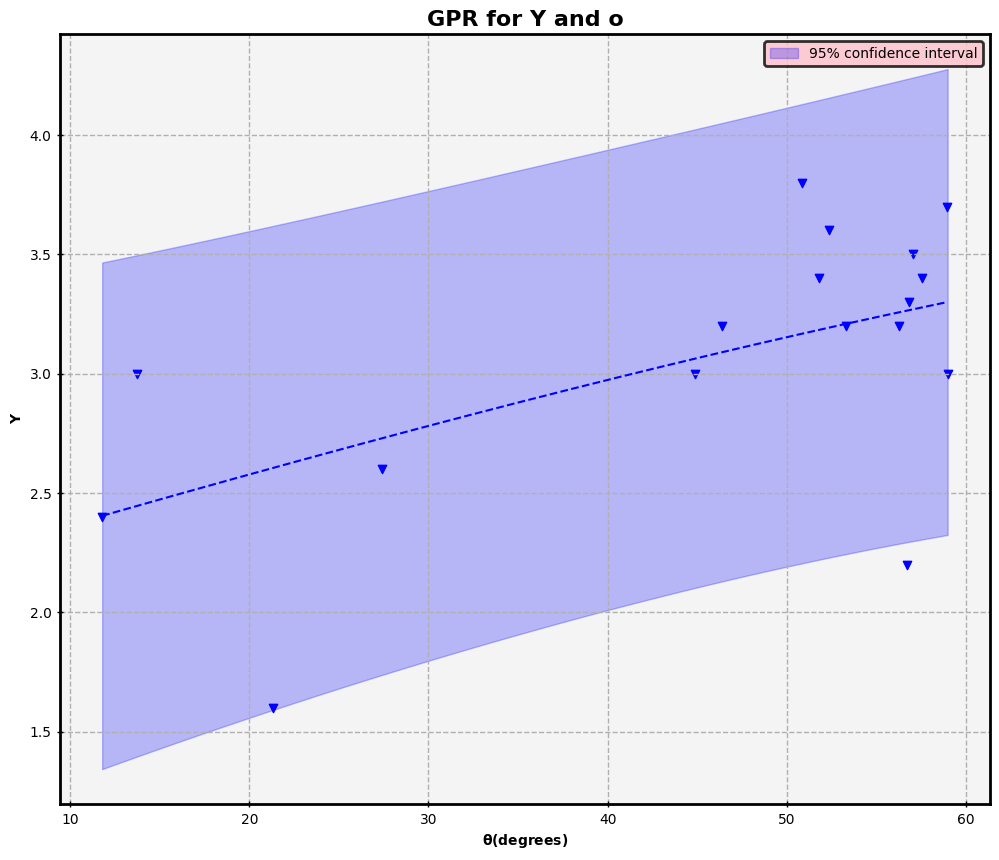

In [16]:
x_test = np.linspace(0,1,1000)
x_test = np.array([x_test])
x_test = np.transpose(x_test)
y_test_mean, y_test_std=gp_Yo.predict(x_test,return_std=True)

## Change here
x_test_plot = o_scaler.inverse_transform(x_test)

#Plots
fig, axs = plt.subplots(1,1,figsize=(12,10))

axs.set_title("GPR for Y and o", fontweight="bold", fontsize=16)

axs.set_xlabel("$\mathbf{\\theta}$(degrees)", fontweight="bold", fontsize=10)

axs.set_ylabel("Y", fontweight="bold", fontsize=10)

axs.scatter(o,Y,color="blue",marker="v")
axs.plot(x_test_plot,y_test_mean,"b--")
axs.fillbetween(
    x_test_plot.ravel(),
    y_test_mean - 1.96 * y_test_std,
    y_test_mean + 1.96 * y_test_std,
    alpha=0.25,
    label=r"95% confidence interval",
    color="blue"
)

#common aspects

axs.grid("on",linestyle="--",linewidth=1)
#axs.set_aspect("equal")
#axs.axis("equal")
axs.set_facecolor("#f4f4f4")
legend = axs.legend(loc="best",fontsize=10)
legend.get_frame().set_linewidth(2)
legend.get_frame().set_edgecolor("black")
legend.get_frame().set_facecolor("pink")
spines_dict = ["top","bottom","left","right"]
for spine_value in spines_dict:
    axs .spines[spine_value].set_linewidth(2)
axs .tick_params(axis="both",direction="inout", length=5, width=1,labelsize=10)

plt.subplots_adjust(hspace=0.3) 

filename = os.path.join(output_path,"GPR_Y_o.pdf")
#plt.savefig(filename)
plt.show()

## GP_Yxo

In [39]:
x_train = np.hstack([x_scaled,o_scaled])
y_train = Y

length_scale_Yxo = [1e-6,1e-6]
length_scalebounds_Yxo = [1e-9, 1e9]
kernel_Yxo = 1*RBF(length_scale = length_scale_Yxo, length_scalebounds=length_scalebounds_Yxo) + WhiteYernel(
    noise_level=1e-4, noise_levelbounds=(1e-5, 1e2))
gp_Yxo = GPR(kernel=kernel_Yxo,n_restarts_optimizer=100,random_state=1)
gp_Yxo.max_iter_predict = 100000000

gp_Yxo.fit(x_train, y_train)
gp_Yxo.kernel_

2.94**2 * RBF(length_scale=[1.98e+07, 3.13]) + WhiteKernel(noise_level=0.226)

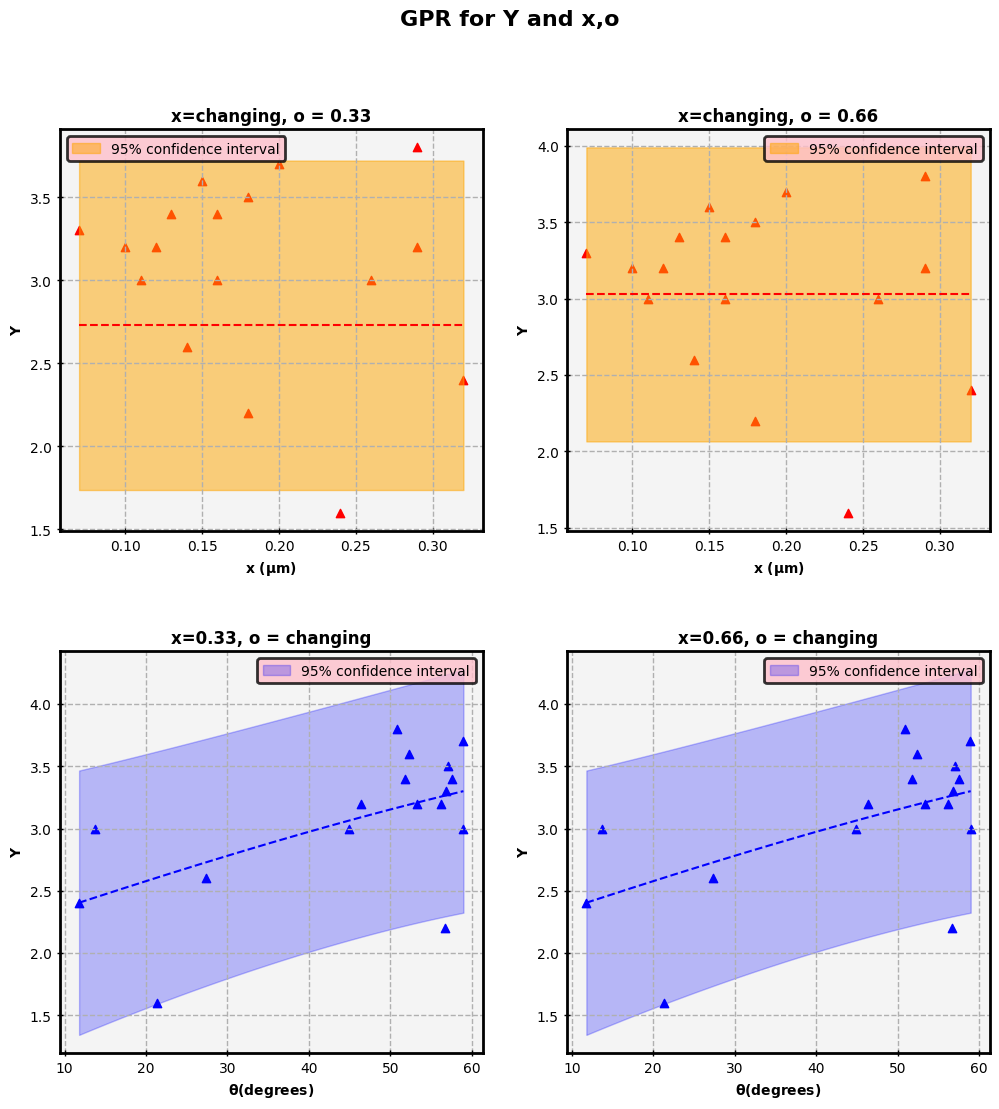

In [41]:
x_test = np.linspace(0,1,1000)
x_test = np.array([x_test])
x_test = np.transpose(x_test)

temp = np.transpose(np.array([np.ones(x_test.size)]))
x_test_33e2 = temp *0.33
x_test_66e2 = temp *0.66

x_test_xv_o33e2 = np.hstack([x_test,x_test_33e2])
x_test_xv_o66e2 = np.hstack([x_test,x_test_66e2])

x_test_x33e2_ov = np.hstack([x_test_33e2,x_test])
x_test_x66e2_ov = np.hstack([x_test_66e2,x_test])

y_test_mean_xv_o33e2, y_test_std_xv_o33e2 = gp_Yxo.predict(x_test_xv_o33e2,return_std=True)
y_test_mean_xv_o66e2, y_test_std_xv_o66e2 = gp_Yxo.predict(x_test_xv_o66e2,return_std=True)
y_test_mean_x33e2_ov, y_test_std_x33e2_ov = gp_Yxo.predict(x_test_x33e2_ov,return_std=True)
y_test_mean_x66e2_ov, y_test_std_x66e2_ov = gp_Yxo.predict(x_test_x66e2_ov,return_std=True)


x_test_xv_plot = x_scaler.inverse_transform(x_test)
# x_test_x33e2_plot = x_scaler.inverse_transform(x_test_33e2)
# x_test_x66e2_plot = x_scaler.inverse_transform(x_test_66e2)

x_test_ov_plot = o_scaler.inverse_transform(x_test)
# x_test_o33e2_plot = o_scaler.inverse_transform(x_test_33e2)
# x_test_o66e2_plot = o_scaler.inverse_transform(x_test_66e2)

# x_test_xv_o33e2_plot = np.hstack([x_test_xv_plot,x_test_o33e2_plot])
# x_test_xv_o66e2_plot = np.hstack([x_test_xv_plot,x_test_o66e2_plot])
                    
# x_test_x33e2_ov_plot = np.hstack([x_test_x33e2_plot,x_test_ov_plot])
# x_test_x66e2_ov_plot = np.hstack([x_test_x66e2_plot,x_test_ov_plot])

#Plots
fig, axs = plt.subplots(2,2,figsize=(12,12))
fig.suptitle("GPR for Y and x,o", fontweight="bold", fontsize=16)

axs[0,0].set_title("x=changing, o = 0.33", fontweight="bold", fontsize=12)
axs[0,0].set_xlabel("x ($\mathbf{\mu m}$)", fontweight="bold", fontsize=10)
axs[0,0].set_ylabel("Y", fontweight="bold", fontsize=10)
axs[0,0].scatter(x,Y,color="red",marker="^")
axs[0,0].plot(x_test_xv_plot,y_test_mean_xv_o33e2,"r--")
axs[0,0].fillbetween(
    x_test_xv_plot.ravel(),
    y_test_mean_xv_o33e2 - 1.96 * y_test_std_xv_o33e2,
    y_test_mean_xv_o33e2 + 1.96 * y_test_std_xv_o33e2,
    alpha=0.5,
    label=r"95% confidence interval",
    color="orange"
)

axs[0,1].set_title("x=changing, o = 0.66", fontweight="bold", fontsize=12)
axs[0,1].set_xlabel("x ($\mathbf{\mu m}$)", fontweight="bold", fontsize=10)
axs[0,1].set_ylabel("Y", fontweight="bold", fontsize=10)
axs[0,1].scatter(x,Y,color="red",marker="^")
axs[0,1].plot(x_test_xv_plot,y_test_mean_xv_o66e2,"r--")
axs[0,1].fillbetween(
    x_test_xv_plot.ravel(),
    y_test_mean_xv_o66e2 - 1.96 * y_test_std_xv_o66e2,
    y_test_mean_xv_o66e2 + 1.96 * y_test_std_xv_o66e2,
    alpha=0.5,
    label=r"95% confidence interval",
    color="orange"
)

axs[1,0].set_title("x=0.33, o = changing", fontweight="bold", fontsize=12)
axs[1,0].set_xlabel("$\mathbf{\\theta}$(degrees)", fontweight="bold", fontsize=10)
axs[1,0].set_ylabel("Y", fontweight="bold", fontsize=10)
axs[1,0].scatter(o,Y,color="blue",marker="^")
axs[1,0].plot(x_test_ov_plot,y_test_mean_x33e2_ov,"b--")
axs[1,0].fillbetween(
    x_test_ov_plot.ravel(),
    y_test_mean_x33e2_ov - 1.96 * y_test_std_x33e2_ov,
    y_test_mean_x33e2_ov + 1.96 * y_test_std_x33e2_ov,
    alpha=0.25,
    label=r"95% confidence interval",
    color="blue"
)

axs[1,1].set_title("x=0.66, o = changing", fontweight="bold", fontsize=12)
axs[1,1].set_xlabel("$\mathbf{\\theta}$(degrees)", fontweight="bold", fontsize=10)
axs[1,1].set_ylabel("Y", fontweight="bold", fontsize=10)
axs[1,1].scatter(o,Y,color="blue",marker="^")
axs[1,1].plot(x_test_ov_plot,y_test_mean_x66e2_ov,"b--")
axs[1,1].fillbetween(
    x_test_ov_plot.ravel(),
    y_test_mean_x66e2_ov - 1.96 * y_test_std_x66e2_ov,
    y_test_mean_x66e2_ov + 1.96 * y_test_std_x66e2_ov,
    alpha=0.25,
    label=r"95% confidence interval",
    color="blue"
)

#common aspects
for axs_num1 in [0,1]:
    for axs_num2 in [0,1]:
        temp = (axs_num1,axs_num2)
        axs[temp].grid("on",linestyle="--",linewidth=1)
        #axs[temp].set_aspect("equal")
        #axs[temp].axis("equal")
        axs[temp].set_facecolor("#f4f4f4")
        legend = axs[temp].legend(loc="best",fontsize=10)
        legend.get_frame().set_linewidth(2)
        legend.get_frame().set_edgecolor("black")
        legend.get_frame().set_facecolor("pink")
        spines_dict = ["top","bottom","left","right"]
        for spine_value in spines_dict:
            axs[temp].spines[spine_value].set_linewidth(2)
        axs[temp].tick_params(axis="both",direction="inout", length=5, width=1,labelsize=10)

plt.subplots_adjust(hspace=0.3) 

filename = os.path.join(output_path,"GPR_Y_xo.pdf")
plt.savefig(filename)
plt.show()